# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.stats.multitest as multi
import numpy as np
from scipy.stats import zscore
import scanpy as sc
import os

# Paths

In [2]:
path_in='../../data'
path_out='./outs/'

# Load data

In [3]:
adata=sc.read_h5ad(path_in+'/MEL_IMM_SS2_GSE120575.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 14160 × 51005
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'treatment_response', 'treatment', 'percent.mt', 'seurat_clusters', 'annotation_CHETAH', 'cell_ontology', 'cell_ontology_id', 'annotation_major', 'annotation_immune', 'annotation_minor'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_tsne', 'X_umap'


In [4]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample,treatment_response,treatment,percent.mt,seurat_clusters,annotation_CHETAH,cell_ontology,cell_ontology_id,annotation_major,annotation_immune,annotation_minor
index,,,,,,,,,,,,,,
A10_P3_M11,A10,409232.42,3274,Pre_P1,Responder,anti-CTLA4,3.950207,16,T CD4,NK,CL:0000623,NK,NK,NK
A11_P1_M11,A11,357029.54,2621,Pre_P1,Responder,anti-CTLA4,2.631995,11,T CD4,T CD8 naïve,CL:0000900,T,T CD8,T CD8 naïve
A11_P3_M11,A11,360530.60,3118,Pre_P1,Responder,anti-CTLA4,5.595626,11,T CD4,T CD8 naïve,CL:0000900,T,T CD8,T CD8 naïve
A11_P4_M11,A11,384902.47,4335,Pre_P1,Responder,anti-CTLA4,2.226492,11,T reg,T CD8 naïve,CL:0000900,T,T CD8,T CD8 naïve
A12_P3_M11,A12,155214.35,2945,Pre_P1,Responder,anti-CTLA4,12.066306,11,T CD4,T CD8 naïve,CL:0000900,T,T CD8,T CD8 naïve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H3_P5_M67_L001_T_enriched,H3,998037.96,4621,Post_P6,Non-responder,anti-PD1,12.266255,6,T CD8,T cycling,Tcycl,T,T cycling,T cycling
H4_P5_M67_L001_T_enriched,H4,1203541.67,6197,Post_P6,Non-responder,anti-PD1,11.683249,6,T CD8,T cycling,Tcycl,T,T cycling,T cycling
H5_P5_M67_L001_T_enriched,H5,333221.47,4785,Post_P6,Non-responder,anti-PD1,10.998559,6,T CD8,T cycling,Tcycl,T,T cycling,T cycling


In [5]:
adata.var

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable
index,,,,,
TSPAN6,0.187429,55.624448,15.659886,2.952744,True
TNMD,0.025424,1.714588,1.125338,1.523620,False
DPM1,25.123941,5881.649656,9646.004091,0.609750,False
SCYL3,11.765325,4097.142960,3859.299081,1.061629,False
C1orf112,12.098376,4653.659295,3994.567182,1.164997,False
...,...,...,...,...,...
RP4-621B10.8,0.182768,88.265061,15.152647,3.793573,True
RP11-114I8.4,0.392161,64.404784,42.633505,1.510661,False
RP11-180C16.1,0.088489,11.094719,6.107714,1.816509,False


In [6]:
adata.X

<Compressed Sparse Column sparse matrix of dtype 'float32'
	with 48632842 stored elements and shape (14160, 51005)>

# Visualize

## UMAP

In [7]:
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.pp.neighbors(adata)

/home/msolovey/miniconda3/envs/community_paper/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
sc.tl.umap(adata)

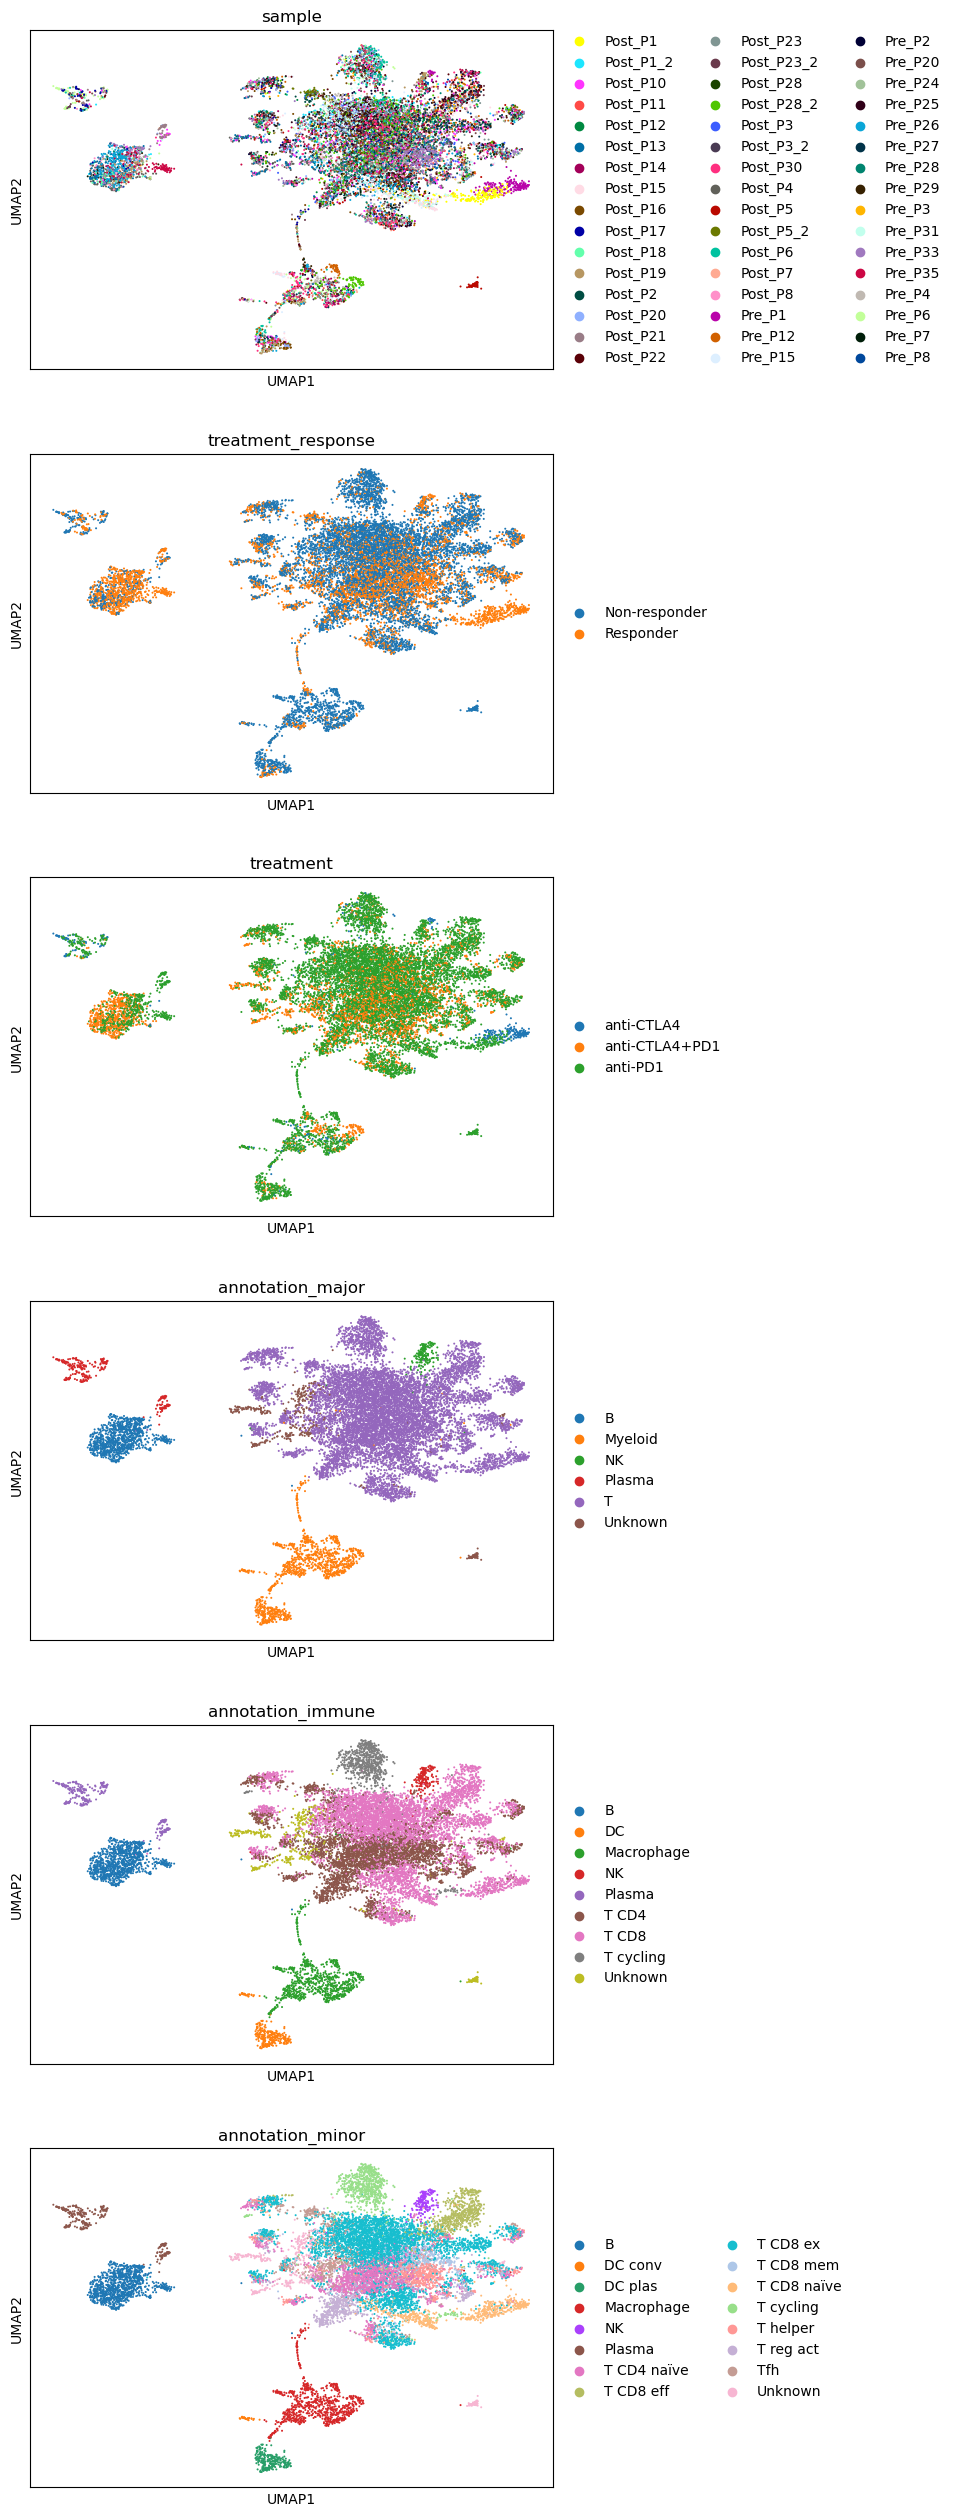

In [9]:

sc.pl.umap(adata
          ,color=['sample','treatment_response','treatment','annotation_major','annotation_immune','annotation_minor']
          ,ncols=1)

# Export

In [10]:
#os.mkdir(path_out)

In [11]:
# export cell annotation matrix
adata.obs.to_csv(path_out+'anno_cells_original.csv')

In [12]:
# export gene annotation matrix
adata.var.to_csv(path_out+'anno_genes_original.csv')

In [13]:
# export count matrix
counts =adata.X.toarray().T
cell_ids=adata.obs_names
gene_ids=adata.var_names

df=pd.DataFrame(counts,index=gene_ids,columns=cell_ids)

df.to_csv(path_out+'counts_original.csv')